<a href="https://colab.research.google.com/github/ZackWongAPO/Colab/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas基础操作

In [1]:
import pandas

##加载表格

###可以选择直接像字典操作一样直接创建表格

In [4]:
# create chart
data = {   'date': [1, 2, 3],
        'feat1': [17, 12, 8],
        'feat2': [1.2, 1.2, 2.2]}
Mydf = pandas.DataFrame(data)
print(Mydf.head())

   date  feat1  feat2
0     1     17    1.2
1     2     12    1.2
2     3      8    2.2


###或者是读取现有表格

####先将本地文件上传至Colab云端虚拟机

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AirPollution.xlsx to AirPollution.xlsx


####再加载csv文件或xls文件为pandas表格
>pandas会将表格加载为Dataframe对象，该对象具有多种访问方法，唯独不能像numpy数组那样直接取出数据

In [ ]:
# csv_file = pandas.read_csv("/content/chicago_taxi_train.csv")   # load .csv

xls_file = pandas.read_excel("/content/AirPollution.xlsx")      # load .xls

###查看自己已经加载好的表格
>至此表格已经加载完毕，可以进行数据预处理和特征工程操作了


In [ ]:
# print(csv_file.head())
# print(csv_file.columns) # colums 指的是有多少个特征值（纵列标签）
# print('一共有{0}个数据\n\n'.format(len(csv_file.index))) # index 指的是有多少组数据（横行索引）

print(xls_file.head())
print(xls_file.columns)
print('一共有{0}个数据\n\n'.format(len(xls_file.index))) # index 指的是有多少个数据

In [ ]:
# print(csv_file.columns) # colums 指的是有多少个属性

print(xls_file.columns)
print('一共有{0}个数据\n\n'.format(len(xls_file.index))) # index 指的是有多少个数据
xls_file.describe(include='all')

Index(['日期', 'AQI', 'PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h', 'Unnamed: 8',
       'Unnamed: 9', '质量等级'],
      dtype='object')
一共有2221个数据




,日期,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h,Unnamed: 8,Unnamed: 9,质量等级
count,2221,2221.000000,2220.000000,2221.000000,2219.000000,2217.000000,2221.000000,2219.000000,0.0,0.0,2221
unique,2221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,2013-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,良
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1343
mean,NaN,76.381360,39.836937,74.014858,18.488058,0.739423,32.658262,97.943668,NaN,NaN,NaN
std,NaN,36.938785,31.402739,43.192960,14.410985,0.396404,16.083952,40.710916,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,3.000000,0.100000,4.000000,0.000000,NaN,NaN,NaN
25%,NaN,53.000000,20.000000,44.000000,9.000000,0.500000,21.000000,66.000000,NaN,NaN,NaN
50%,NaN,68.000000,31.000000,64.000000,14.000000,0.600000,30.000000,92.000000,NaN,NaN,NaN
75%,NaN,91.000000,50.000000,92.000000,23.000000,0.900000,43.000000,125.000000,NaN,NaN,NaN


##表格数据处理基础(*增删改查*)

###查
>DataFrame对象是一个二维表格，可拆分为行的集合或列的集合，每一行或每一列都可以被看做一个Series对象，这使得pandas可以一次实现整行或整列的操作。每个单元格事实上也被视为一个一行一列的Series对象

####查找特定行和列

In [ ]:
# 所有查询都是返回Series对象
hang = xls_file.loc[1]  # 查询单行
lie = xls_file['日期']  # 查询单列

# 所有查询都是返回Series对象列表
manyhang = xls_file.loc[1:3]      # 查询多行
manylie = xls_file['日期', 'PM2.5']  # 查询多列

####查找特定的单元格

In [ ]:
# 有四种查询方式，返回值不一样
colum = xls_file.loc[1, '日期']# 单元格对象 = 表格.loc[横列索引值， 特征值]
colum = xls_file.iloc[1, 1]  # 单元格对象 = 表格.iloc[横列索引值， 纵列索引值]
data = xls_file.at[1, '日期'] # 单元格数据本身 = 表格.at[横列索引值， 特征值]

>最重要的是从表格中获取自己对于数据的宏观认识，以下补充代码可以进一步了解数据

In [ ]:
# What is the maximum AQI?
max_AQI = xls_file['AQI'].max()
print("What is the maximum AQI? \t\t\t\tAnswer: {0}".format(max_AQI))

# What is the mean PM2.5?
mean_PM25 = xls_file['PM2.5'].mean()
print("What is the mean PM2.5? \t\tAnswer: {0}".format(mean_PM25))

# How many quality levels are in the dataset?
num_unique_quality_level =  xls_file['质量等级'].nunique()
print("How many quality levels are in the dataset? \t\tAnswer: {0}".format(num_unique_quality_level))

# What is the most frequent quality level?
most_freq_quality_level = xls_file['质量等级'].value_counts().idxmax()
print("What is the most frequent quality level? \t\tAnswer: {0}".format(most_freq_quality_level))

# Are any features missing data?
missing_values = xls_file.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

What is the maximum AQI? 				Answer: 356
What is the mean PM2.5? 		Answer: 39.83693693693694
How many quality levels are in the dataset? 		Answer: 7
What is the most frequent quality level? 		Answer: 良
Are any features missing data? 				Answer: Yes


###研究属性与预测值之间的相关性



>利用散点图直观的看出属性值与预测值之间的关系，优点是可以看出除了直线型相关之外的其他相关性，缺点是缺乏衡量标准且主要凭借开发者经验，由数值分析的内容可知，在拟合时会遇到基的选取问题，而这个基可以不仅仅是多项式，还可以是指数基、对数基甚至是三角基。

>使用相关矩阵进行分析可以快速并准确地发现各属性与预测结果之间的线性相关性，甚至是发现属性之间的线性相关性，这样就可以减少需要分析的可解释属性量
>>相关性这一概念是由点乘这一概念引申过来的，因为点乘同时会涉及到两向量模长与夹角值的大小，将点乘转化至高维空间便成为了内积，但是内积值没有被归一化，你不能说原本就大的两向量比原本就小的两个向量更为相关(夹角一致的前提下)，所以再用内积值除以向量本身的模长来进行归一化，就会直呈现两个向量之间的夹角关系。(协方差与相关系数可以理解为统计学中的内积)
* `1.0`: 完全直线性正相关
* `-1.0`: 完全直线型负相关
* `0.0`: 两向量间直线性不相关



In [ ]:
# 观察数据集的相关矩阵
xls_file.corr(numeric_only = True)

,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h,Unnamed: 8,Unnamed: 9
AQI,1.000000,0.840454,0.834786,0.450492,0.620895,0.550180,0.266832,NaN,NaN
PM2.5,0.840454,1.000000,0.869745,0.637476,0.807569,0.718248,-0.119168,NaN,NaN
PM10,0.834786,0.869745,1.000000,0.527824,0.692095,0.669425,-0.004023,NaN,NaN
SO2,0.450492,0.637476,0.527824,1.000000,0.740841,0.740156,-0.340359,NaN,NaN
CO,0.620895,0.807569,0.692095,0.740841,1.000000,0.778000,-0.274257,NaN,NaN
NO2,0.550180,0.718248,0.669425,0.740156,0.778000,1.000000,-0.230173,NaN,NaN
O3_8h,0.266832,-0.119168,-0.004023,-0.340359,-0.274257,-0.230173,1.000000,NaN,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.   由上表可发现AQI与臭氧浓度没有太大线性相关性，建议画散点图从而进一步发掘两者之间的其他相关性。
2.   PM2.5与PM10之间有很强的线性相关性，我甚至感觉预测的时候只用PM2.5或是PM10的指标进行预测就足矣了。
3.   空气污染情况与AQI是直接相关的分段函数关系，可以忽略该属性

>用seaborn库进行**pair plot**(*成对散点图*)的绘制，从而进一步发现属性之间的其余相关性

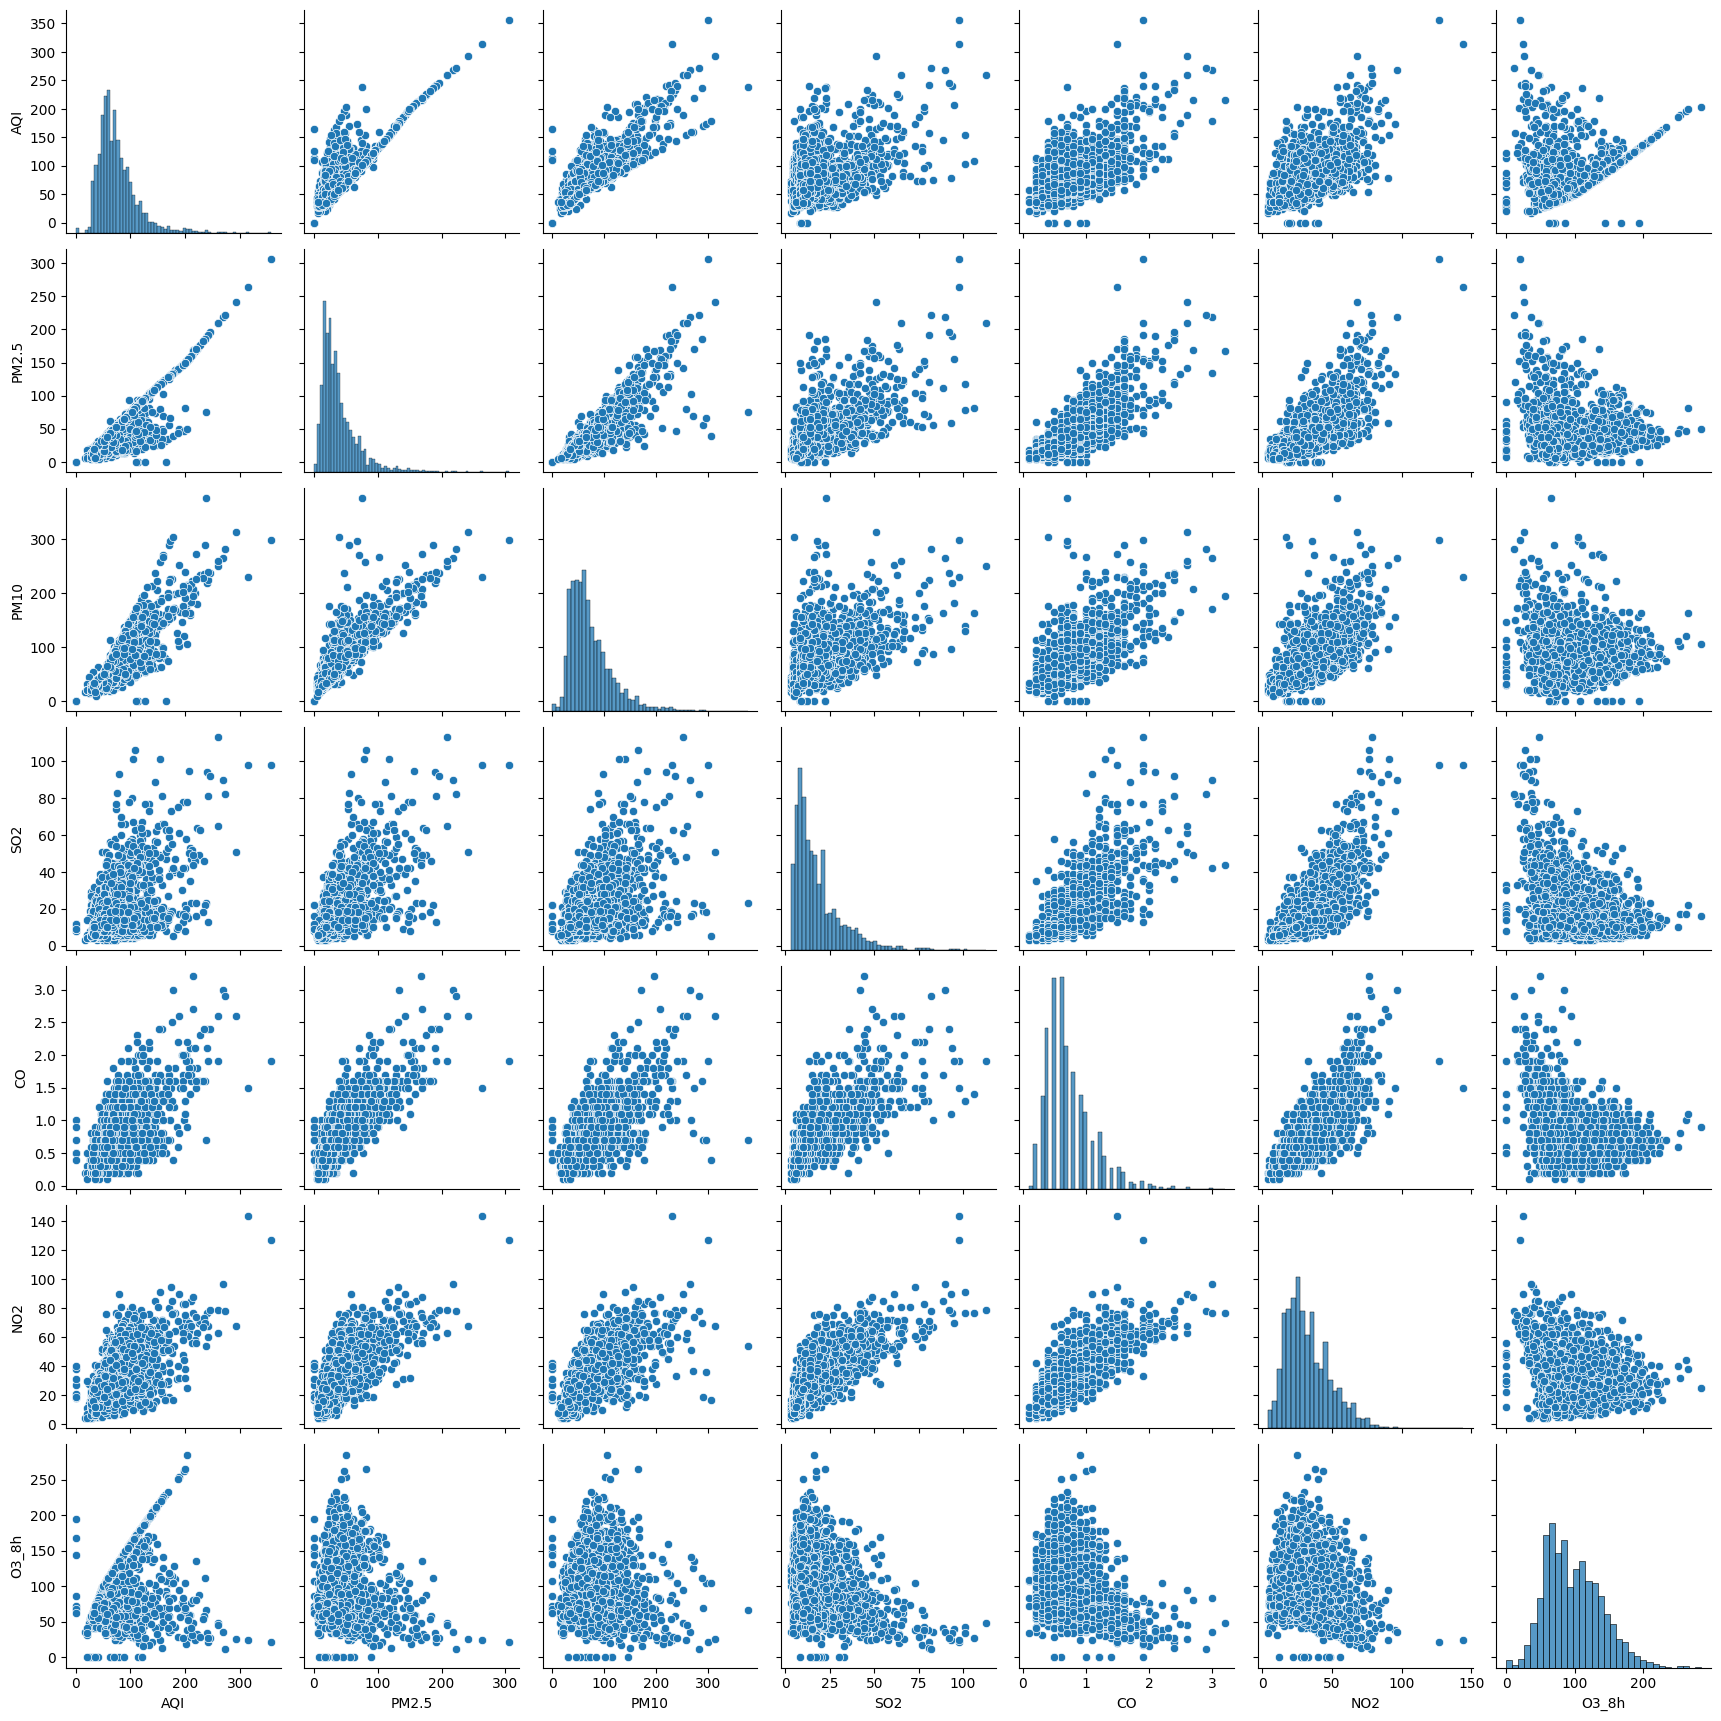

In [ ]:
import seaborn
seaborn.pairplot(xls_file, x_vars=['AQI', 'PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h'],
                 y_vars=['AQI', 'PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h'])